In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/equip_failures_training_set.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
pd.set_option("max_rows", None)

In [6]:
df.head(20)

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor24_histogram_bin9,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor25_histogram_bin9,sensor26_histogram_bin0,sensor26_histogram_bin1,sensor26_histogram_bin2,sensor26_histogram_bin3,sensor26_histogram_bin4,sensor26_histogram_bin5,sensor26_histogram_bin6,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor27_measure,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor32_measure,sensor33_measure,sensor34_measure,sensor35_measure,sensor36_measure,sensor37_measure,sensor38_measure,sensor39_measure,sensor40_measure,sensor41_measure,sensor42_measure,sensor43_measure,sensor44_measure,sensor45_measure,sensor46_measure,sensor47_measure,sensor48_measure,sensor49_measure,sensor50_measure,sensor51_measure,sensor52_measure,sensor53_measure,sensor54_measure,sensor55_measure,sensor56_measure,sensor57_measure,sensor58_measure,sensor59_measure,sensor60_measure,sensor61_measure,sensor62_measure,sensor63_measure,sensor64_histogram_bin0,sensor64_histogram_bin1,sensor64_histogram_bin2,sensor64_histogram_bin3,sensor64_histogram_bin4,sensor64_histogram_bin5,sensor64_histogram_bin6,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor65_measure,sensor66_measure,sensor67_measure,sensor68_measure,sensor69_histogram_bin0,sensor69_histogram_bin1,sensor69_histogram_bin2,sensor69_histogram_bin3,sensor69_histogram_bin4,sensor69_histogram_bin5,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor73_measure,sensor74_measure,sensor75_measure,sensor76_measure,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,42

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 172 entries, id to sensor107_measure
dtypes: int64(3), object(169)
memory usage: 78.7+ MB


In [8]:
df.target.value_counts()

0    59000
1     1000
Name: target, dtype: int64

#### The data is very unbalanced. Targets with value "1" are less than 2%.

In [9]:
df.tail(30)

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor24_histogram_bin9,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor25_histogram_bin9,sensor26_histogram_bin0,sensor26_histogram_bin1,sensor26_histogram_bin2,sensor26_histogram_bin3,sensor26_histogram_bin4,sensor26_histogram_bin5,sensor26_histogram_bin6,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor27_measure,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor32_measure,sensor33_measure,sensor34_measure,sensor35_measure,sensor36_measure,sensor37_measure,sensor38_measure,sensor39_measure,sensor40_measure,sensor41_measure,sensor42_measure,sensor43_measure,sensor44_measure,sensor45_measure,sensor46_measure,sensor47_measure,sensor48_measure,sensor49_measure,sensor50_measure,sensor51_measure,sensor52_measure,sensor53_measure,sensor54_measure,sensor55_measure,sensor56_measure,sensor57_measure,sensor58_measure,sensor59_measure,sensor60_measure,sensor61_measure,sensor62_measure,sensor63_measure,sensor64_histogram_bin0,sensor64_histogram_bin1,sensor64_histogram_bin2,sensor64_histogram_bin3,sensor64_histogram_bin4,sensor64_histogram_bin5,sensor64_histogram_bin6,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor65_measure,sensor66_measure,sensor67_measure,sensor68_measure,sensor69_histogram_bin0,sensor69_histogram_bin1,sensor69_histogram_bin2,sensor69_histogram_bin3,sensor69_histogram_bin4,sensor69_histogram_bin5,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor73_measure,sensor74_measure,sensor75_measure,sensor76_measure,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
59970,59971,0,16,0,8,na,0,0,0,0,0,0,108,5176,2234,0,0,0,2660,0,68,0,0,0,6832,4440,20736,682,0,0,0,0,6,22,0,0,0,0,0,0,0,4082,3436,0,62,10,14,476,572,268,6116,0,0,0,6220,264,118,276,48,54,396,48,24,70,27598,0,4,0,0,2660,180,18772,1938,na,na,na,na,na,na,na,na,20580,16.62,27598,27598,28590,28,82,2656,27400,7562,1209600,0,na,na,na,2814.72,0,3699.84,0,6,0,0,0,4956,1668,346,548,0,0,0,na,8,27598,0,1090,10,10,2,350,1066,4060,866,64,0,na,na,na,na,na,na,na,na,na,46,84,0,0,0,0,0,0,0,0,178,0,0,866,350,90,28,9100,1378,14,20,0,0,0,85,38,4946,2304,78,30,56,28,34,42,0,0,0,0
59971,59972,0,39026,na,202,168,0,0,0,0,0,0,215

In [10]:
df.isna().sum()

id                          0
target                      0
sensor1_measure             0
sensor2_measure             0
sensor3_measure             0
sensor4_measure             0
sensor5_measure             0
sensor6_measure             0
sensor7_histogram_bin0      0
sensor7_histogram_bin1      0
sensor7_histogram_bin2      0
sensor7_histogram_bin3      0
sensor7_histogram_bin4      0
sensor7_histogram_bin5      0
sensor7_histogram_bin6      0
sensor7_histogram_bin7      0
sensor7_histogram_bin8      0
sensor7_histogram_bin9      0
sensor8_measure             0
sensor9_measure             0
sensor10_measure            0
sensor11_measure            0
sensor12_measure            0
sensor13_measure            0
sensor14_measure            0
sensor15_measure            0
sensor16_measure            0
sensor17_measure            0
sensor18_measure            0
sensor19_measure            0
sensor20_measure            0
sensor21_measure            0
sensor22_measure            0
sensor23_m

#### At first we could say that there are no missing values, but there are a lot of them. The reason why they are not shown is that instead of NaN values we have "na" which is a string and for pandas it is a value.
#### We have to change those values to NaN to check the amounts

In [11]:
df.replace(to_replace="na", value=np.nan, inplace=True)

In [12]:
df.head(20)

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor24_histogram_bin9,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor25_histogram_bin9,sensor26_histogram_bin0,sensor26_histogram_bin1,sensor26_histogram_bin2,sensor26_histogram_bin3,sensor26_histogram_bin4,sensor26_histogram_bin5,sensor26_histogram_bin6,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor27_measure,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor32_measure,sensor33_measure,sensor34_measure,sensor35_measure,sensor36_measure,sensor37_measure,sensor38_measure,sensor39_measure,sensor40_measure,sensor41_measure,sensor42_measure,sensor43_measure,sensor44_measure,sensor45_measure,sensor46_measure,sensor47_measure,sensor48_measure,sensor49_measure,sensor50_measure,sensor51_measure,sensor52_measure,sensor53_measure,sensor54_measure,sensor55_measure,sensor56_measure,sensor57_measure,sensor58_measure,sensor59_measure,sensor60_measure,sensor61_measure,sensor62_measure,sensor63_measure,sensor64_histogram_bin0,sensor64_histogram_bin1,sensor64_histogram_bin2,sensor64_histogram_bin3,sensor64_histogram_bin4,sensor64_histogram_bin5,sensor64_histogram_bin6,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor65_measure,sensor66_measure,sensor67_measure,sensor68_measure,sensor69_histogram_bin0,sensor69_histogram_bin1,sensor69_histogram_bin2,sensor69_histogram_bin3,sensor69_histogram_bin4,sensor69_histogram_bin5,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor73_measure,sensor74_measure,sensor75_measure,sensor76_measure,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,NaN,NaN,NaN,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,NaN,10476,1226,267998,5218

In [13]:
df.isna().sum()

id                              0
target                          0
sensor1_measure                 0
sensor2_measure             46329
sensor3_measure              3335
sensor4_measure             14861
sensor5_measure              2500
sensor6_measure              2500
sensor7_histogram_bin0        671
sensor7_histogram_bin1        671
sensor7_histogram_bin2        671
sensor7_histogram_bin3        671
sensor7_histogram_bin4        671
sensor7_histogram_bin5        671
sensor7_histogram_bin6        671
sensor7_histogram_bin7        671
sensor7_histogram_bin8        671
sensor7_histogram_bin9        671
sensor8_measure               645
sensor9_measure               629
sensor10_measure              629
sensor11_measure             4400
sensor12_measure              642
sensor13_measure              629
sensor14_measure              642
sensor15_measure              589
sensor16_measure              642
sensor17_measure              589
sensor18_measure             2723
sensor19_measu

#### As we can see right now there are a lot of missing values and we have to deal with them

In [14]:
df_temp = df

In [15]:
# Let's fill all NaN's with zeros
df_temp.fillna(0, inplace=True)

In [16]:
df_temp.head(20)

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor24_histogram_bin9,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor25_histogram_bin9,sensor26_histogram_bin0,sensor26_histogram_bin1,sensor26_histogram_bin2,sensor26_histogram_bin3,sensor26_histogram_bin4,sensor26_histogram_bin5,sensor26_histogram_bin6,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor27_measure,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor32_measure,sensor33_measure,sensor34_measure,sensor35_measure,sensor36_measure,sensor37_measure,sensor38_measure,sensor39_measure,sensor40_measure,sensor41_measure,sensor42_measure,sensor43_measure,sensor44_measure,sensor45_measure,sensor46_measure,sensor47_measure,sensor48_measure,sensor49_measure,sensor50_measure,sensor51_measure,sensor52_measure,sensor53_measure,sensor54_measure,sensor55_measure,sensor56_measure,sensor57_measure,sensor58_measure,sensor59_measure,sensor60_measure,sensor61_measure,sensor62_measure,sensor63_measure,sensor64_histogram_bin0,sensor64_histogram_bin1,sensor64_histogram_bin2,sensor64_histogram_bin3,sensor64_histogram_bin4,sensor64_histogram_bin5,sensor64_histogram_bin6,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor65_measure,sensor66_measure,sensor67_measure,sensor68_measure,sensor69_histogram_bin0,sensor69_histogram_bin1,sensor69_histogram_bin2,sensor69_histogram_bin3,sensor69_histogram_bin4,sensor69_histogram_bin5,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor73_measure,sensor74_measure,sensor75_measure,sensor76_measure,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,0,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,0,0,0,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,0,10476,1226,267998,521832,428776,

In [17]:
# To check descriptive statistics we have to change data types from object to float 
# (we cannot change to integer because we would have to round up the numbers)
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("float")

In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 172 entries, id to sensor107_measure
dtypes: float64(169), int64(3)
memory usage: 78.7 MB


In [19]:
df_temp.describe(include="all")

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor24_histogram_bin9,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor25_histogram_bin9,sensor26_histogram_bin0,sensor26_histogram_bin1,sensor26_histogram_bin2,sensor26_histogram_bin3,sensor26_histogram_bin4,sensor26_histogram_bin5,sensor26_histogram_bin6,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor27_measure,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor32_measure,sensor33_measure,sensor34_measure,sensor35_measure,sensor36_measure,sensor37_measure,sensor38_measure,sensor39_measure,sensor40_measure,sensor41_measure,sensor42_measure,sensor43_measure,sensor44_measure,sensor45_measure,sensor46_measure,sensor47_measure,sensor48_measure,sensor49_measure,sensor50_measure,sensor51_measure,sensor52_measure,sensor53_measure,sensor54_measure,sensor55_measure,sensor56_measure,sensor57_measure,sensor58_measure,sensor59_measure,sensor60_measure,sensor61_measure,sensor62_measure,sensor63_measure,sensor64_histogram_bin0,sensor64_histogram_bin1,sensor64_histogram_bin2,sensor64_histogram_bin3,sensor64_histogram_bin4,sensor64_histogram_bin5,sensor64_histogram_bin6,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor65_measure,sensor66_measure,sensor67_measure,sensor68_measure,sensor69_histogram_bin0,sensor69_histogram_bin1,sensor69_histogram_bin2,sensor69_histogram_bin3,sensor69_histogram_bin4,sensor69_histogram_bin5,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor73_measure,sensor74_measure,sensor75_measure,sensor76_measure,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
count,60000.000000,60000.000000,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.0000

#### We know that there are no columns with all zeros (as I also checked there are no rows with all zeros) so we cannot delete anything. In my opinion we shouldn't also remove columns or rows where there are mostly zeros because we shouldn't exclude any of the sensors without knowing it's function

In [20]:
### Let's now check the skewness of the data
df_temp.skew()

id                            0.000000
target                        7.551146
sensor1_measure               6.115752
sensor2_measure              57.036158
sensor3_measure               1.877413
sensor4_measure             244.948972
sensor5_measure              92.531591
sensor6_measure              52.780674
sensor7_histogram_bin0      154.252527
sensor7_histogram_bin1       76.504938
sensor7_histogram_bin2       37.234884
sensor7_histogram_bin3       23.920528
sensor7_histogram_bin4       22.411390
sensor7_histogram_bin5        9.183921
sensor7_histogram_bin6        8.307167
sensor7_histogram_bin7       12.433831
sensor7_histogram_bin8       35.870539
sensor7_histogram_bin9       98.842723
sensor8_measure               5.560929
sensor9_measure              47.702799
sensor10_measure             75.472460
sensor11_measure            118.036427
sensor12_measure             29.046695
sensor13_measure             28.509285
sensor14_measure              5.594356
sensor15_measure         

<ipython-input-21-f01d61f68462>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  df_temp[col].plot(fig=plt.figure(i))


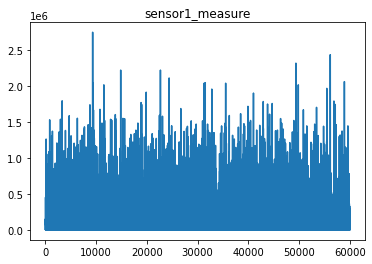

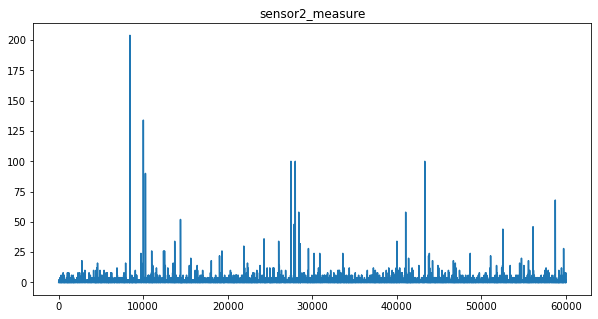

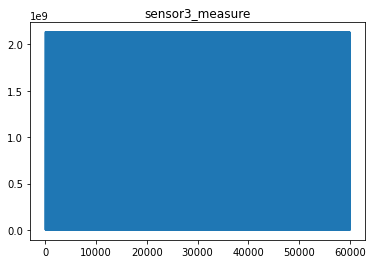

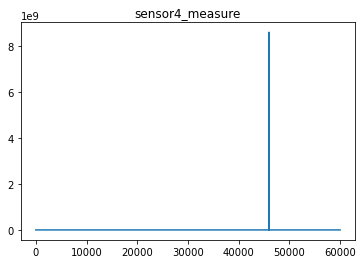

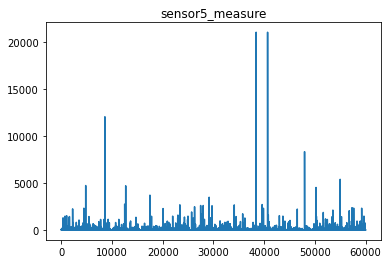

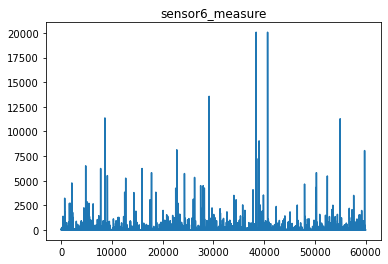

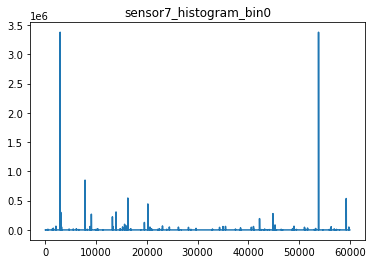

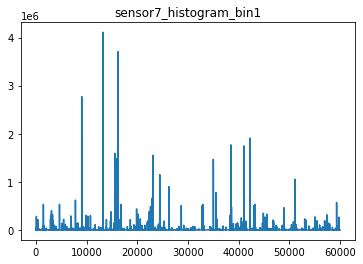

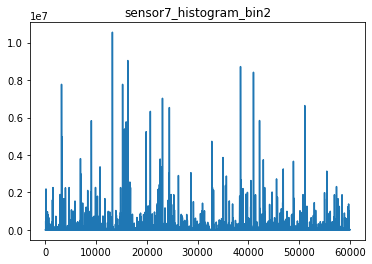

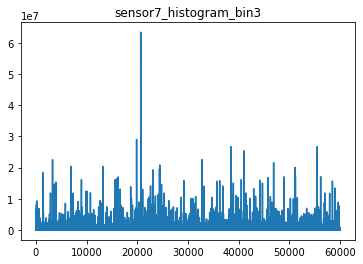

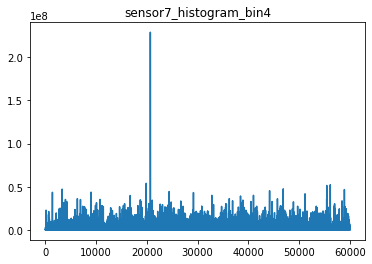

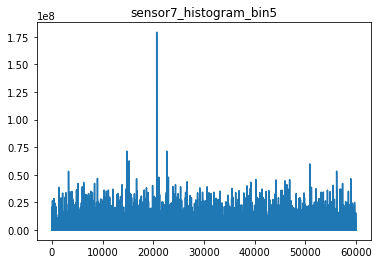

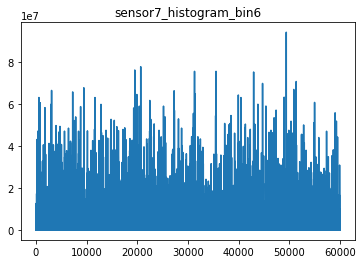

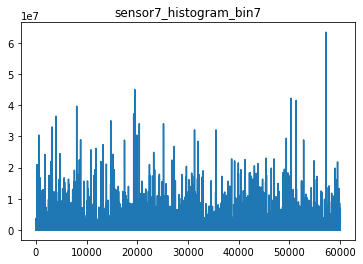

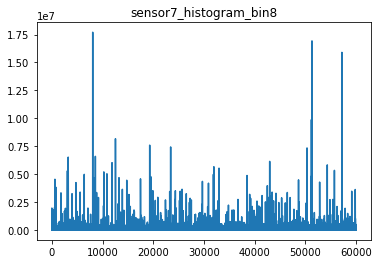

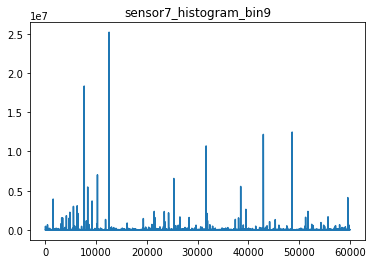

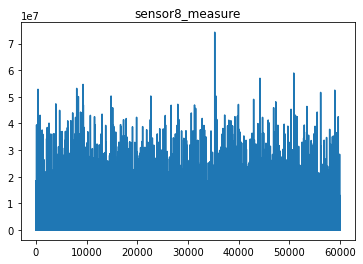

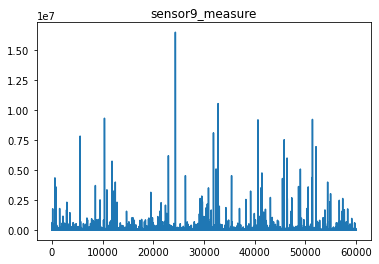

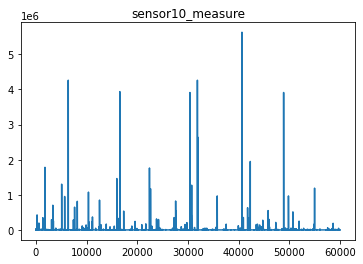

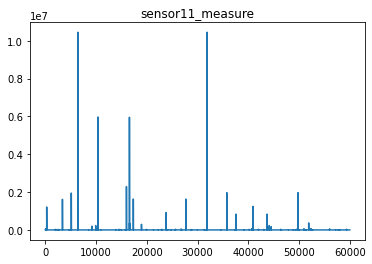

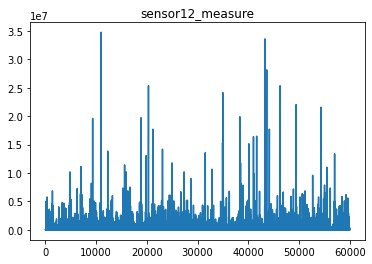

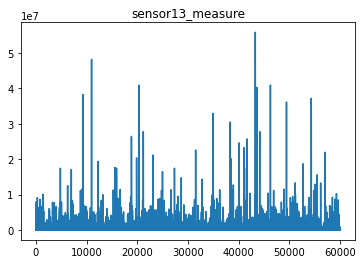

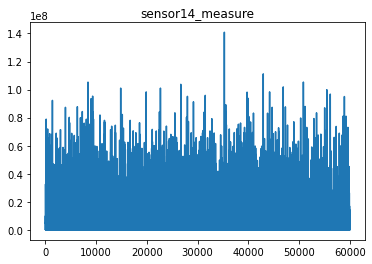

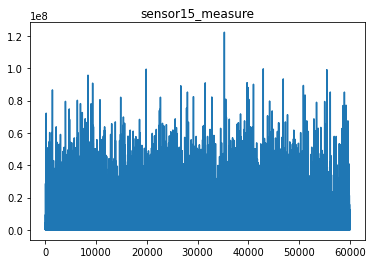

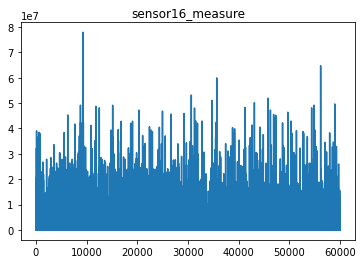

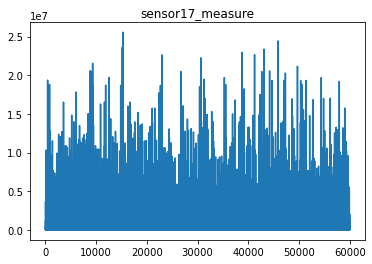

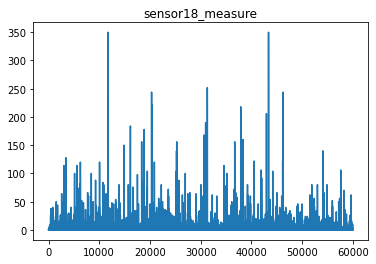

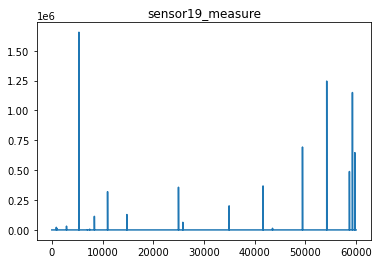

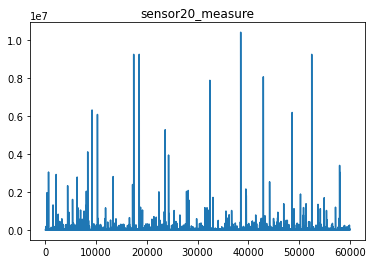

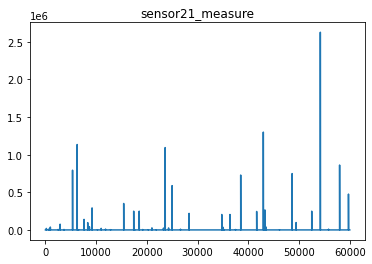

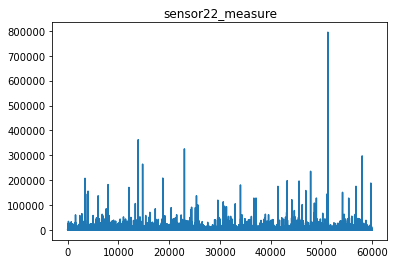

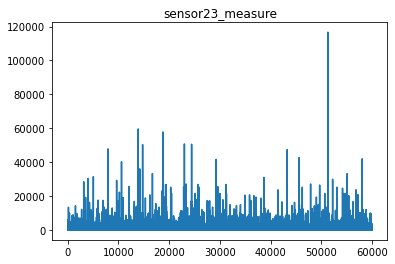

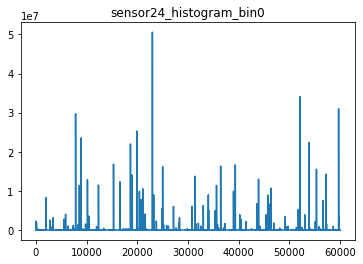

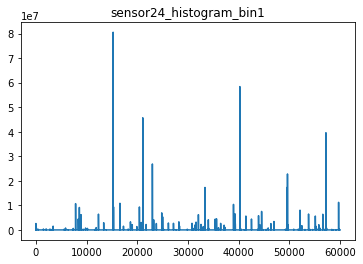

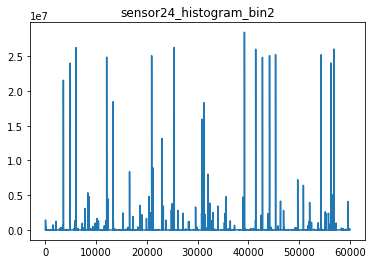

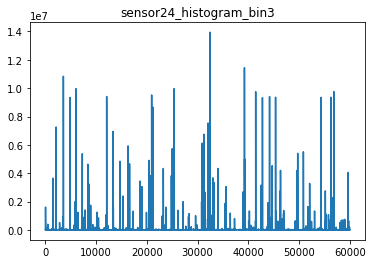

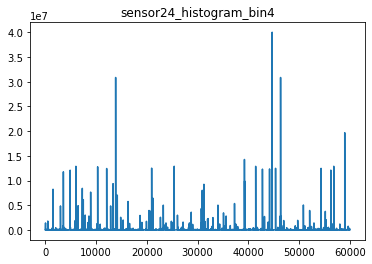

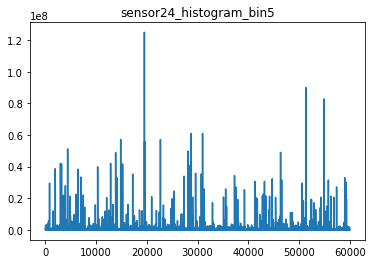

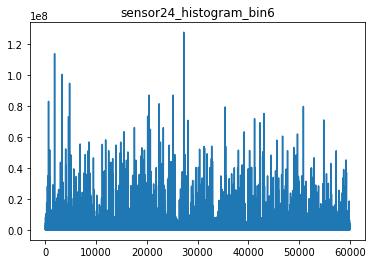

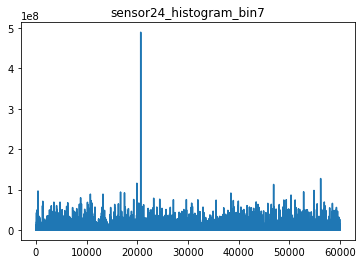

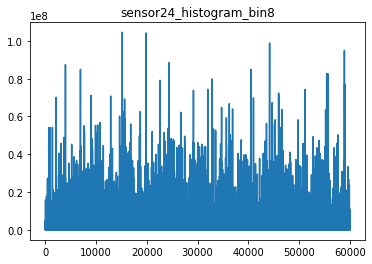

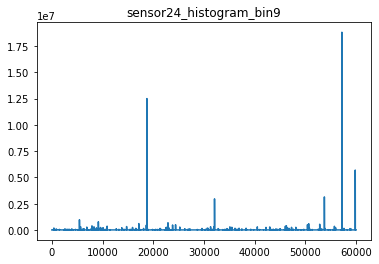

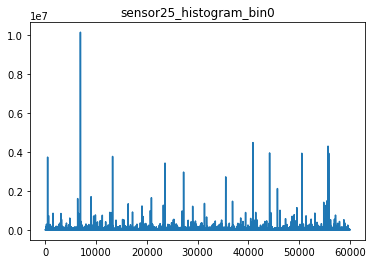

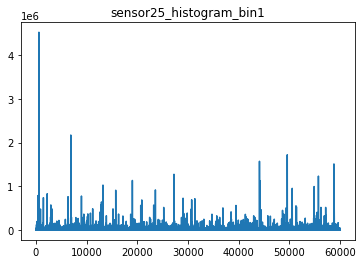

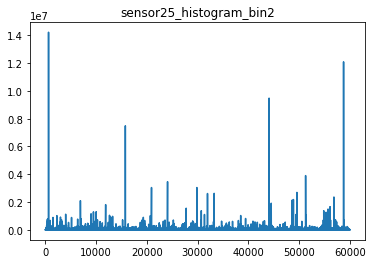

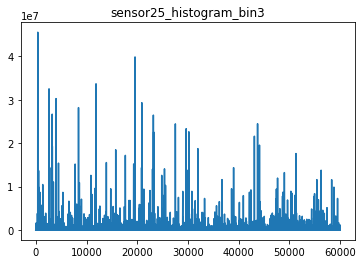

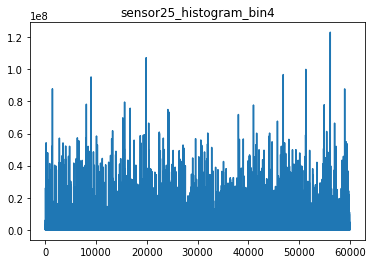

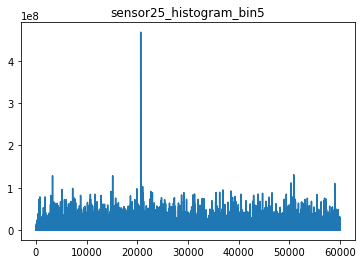

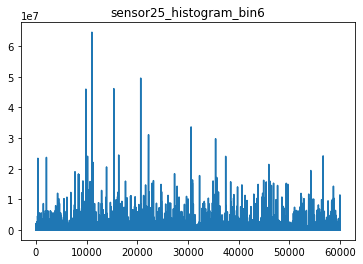

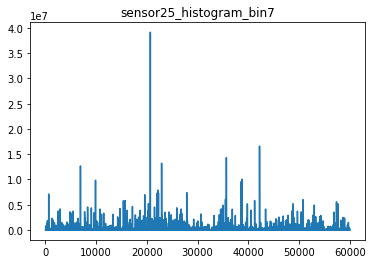

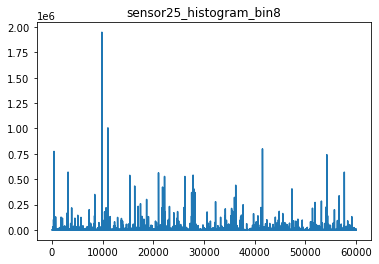

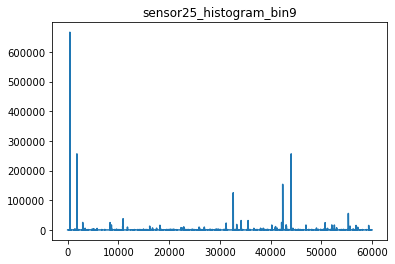

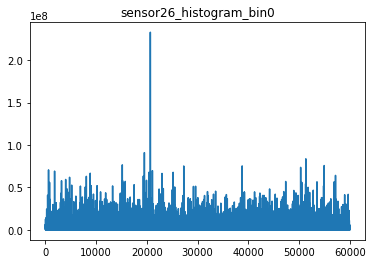

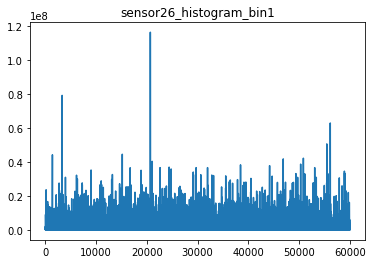

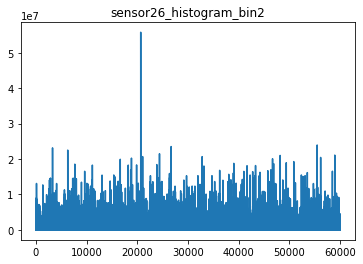

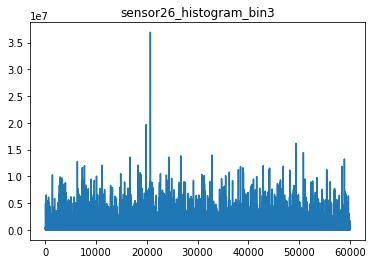

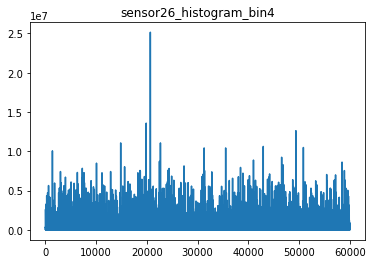

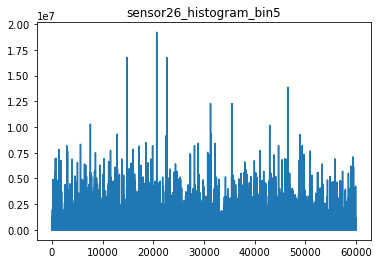

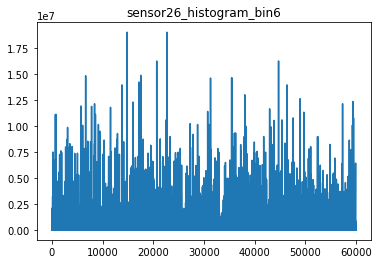

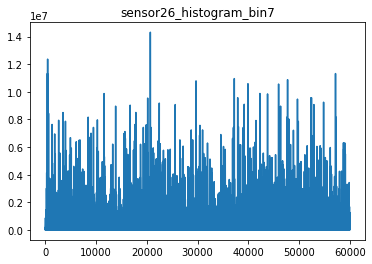

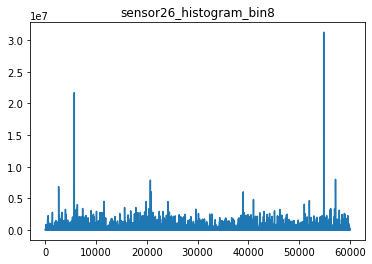

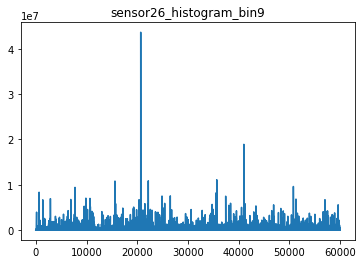

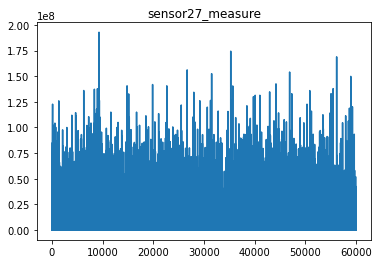

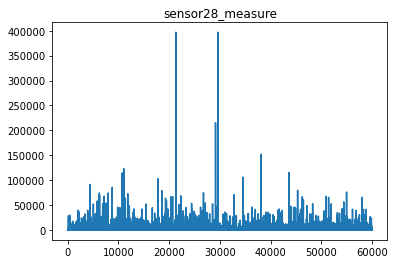

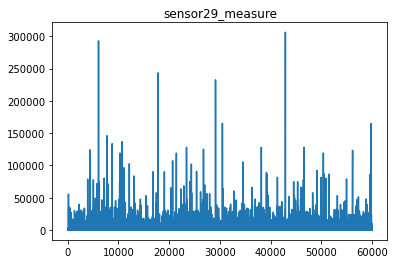

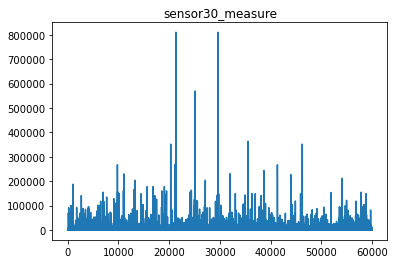

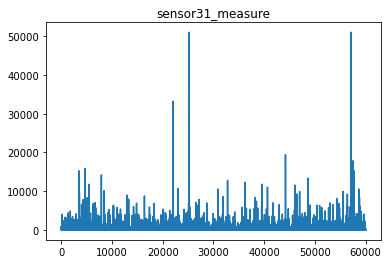

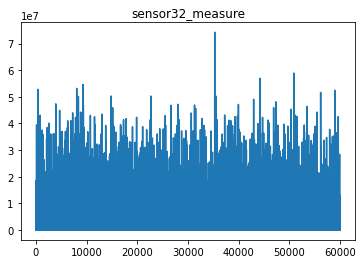

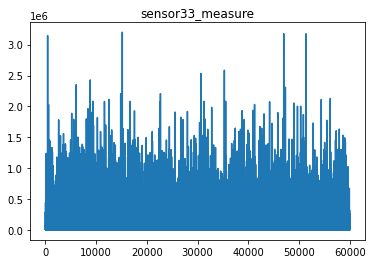

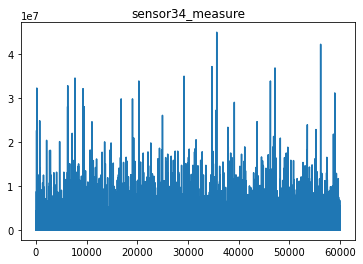

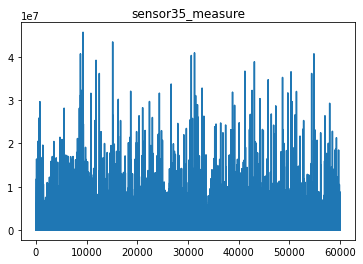

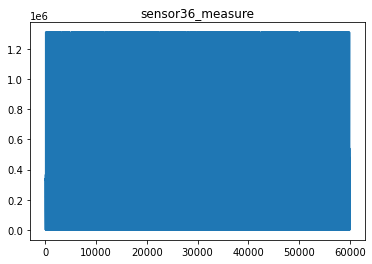

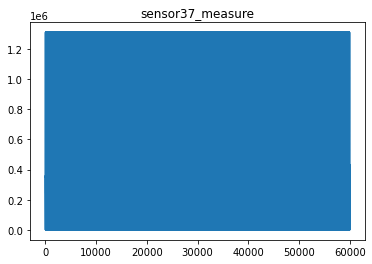

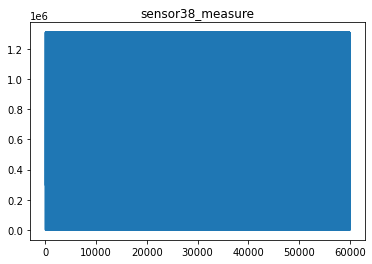

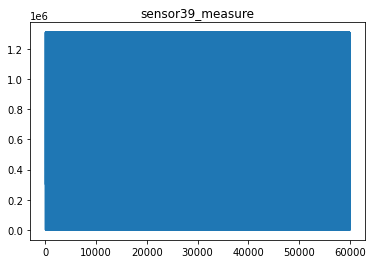

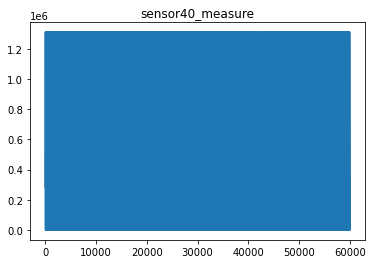

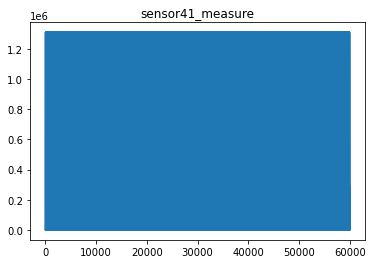

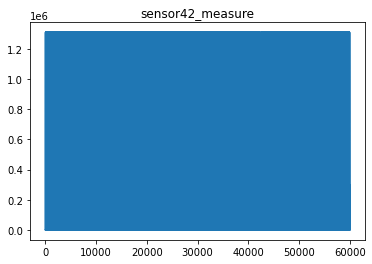

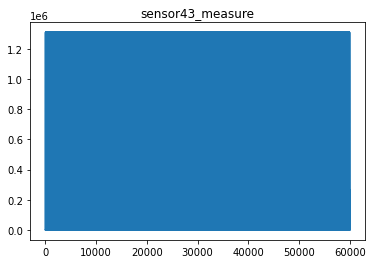

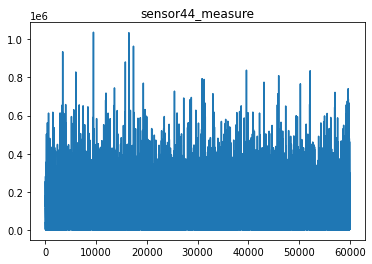

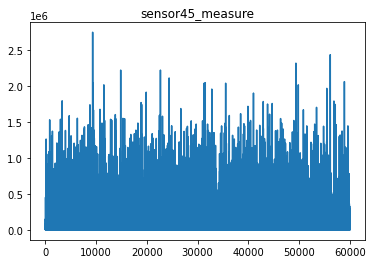

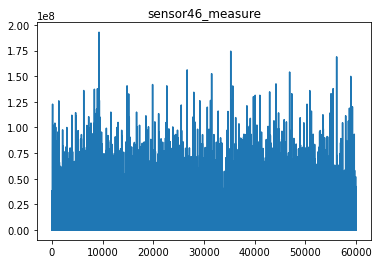

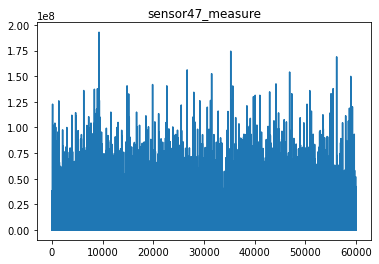

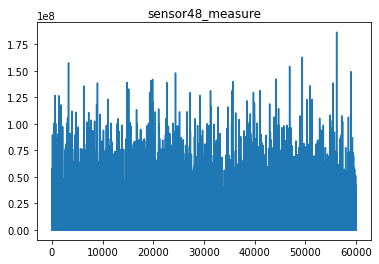

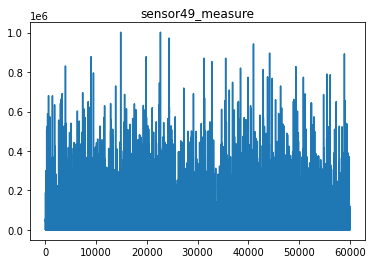

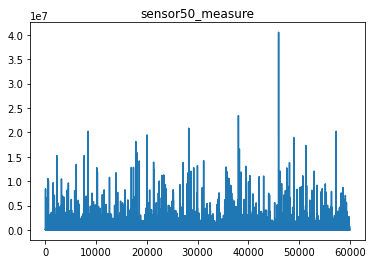

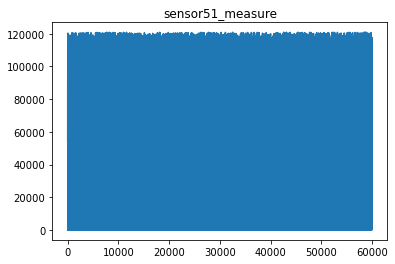

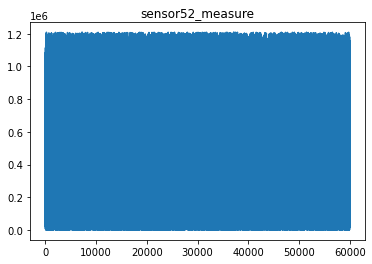

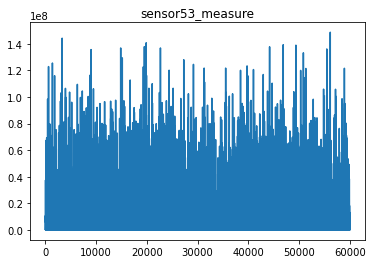

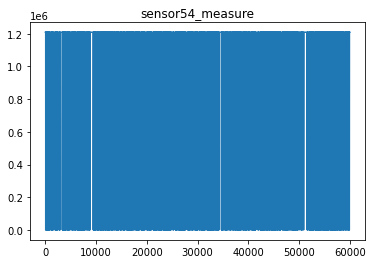

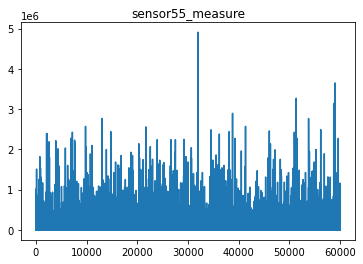

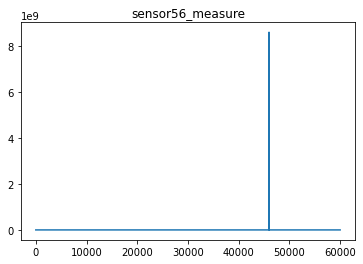

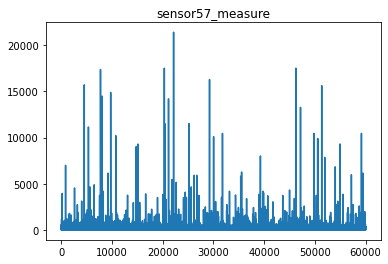

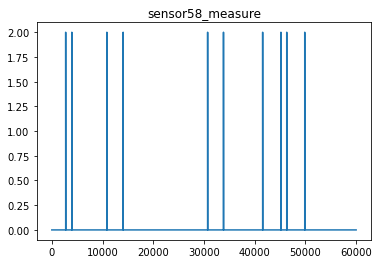

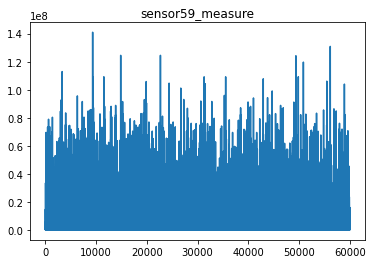

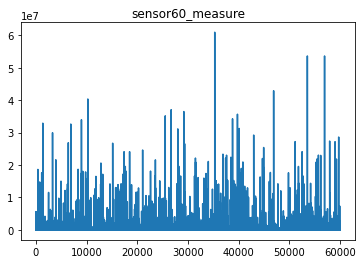

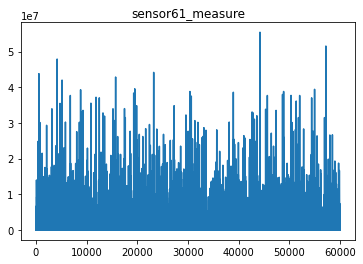

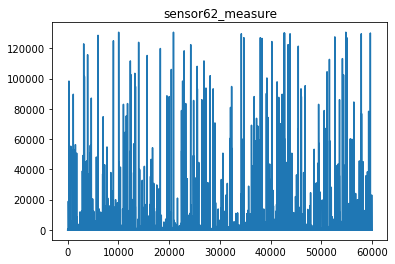

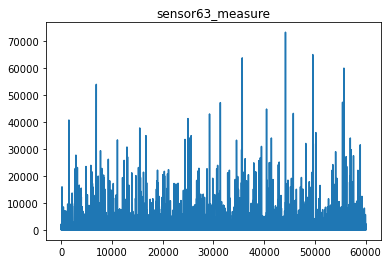

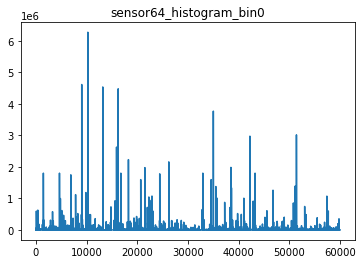

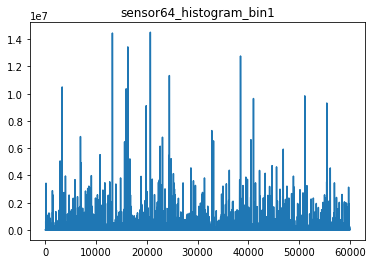

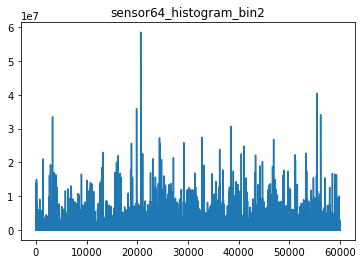

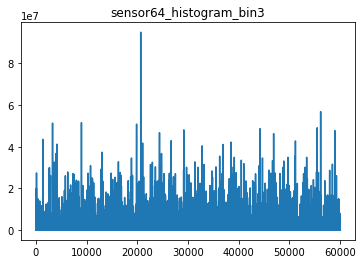

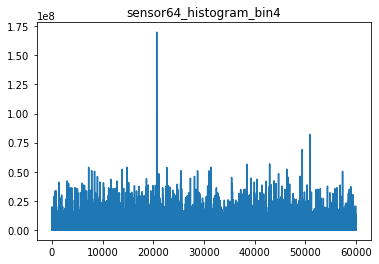

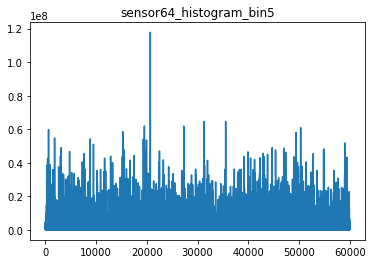

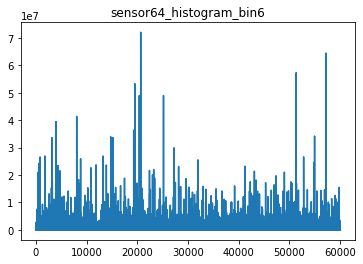

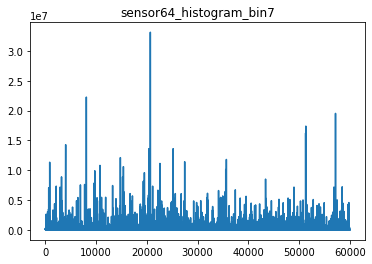

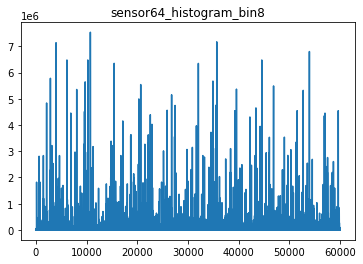

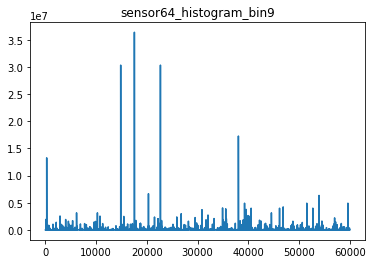

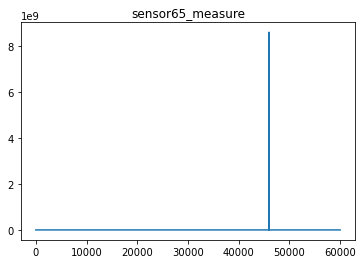

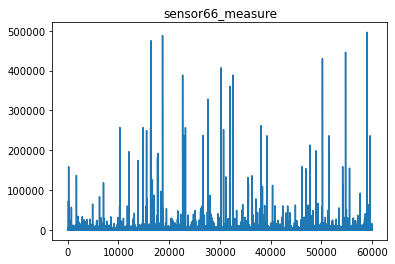

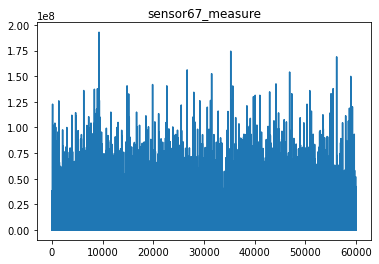

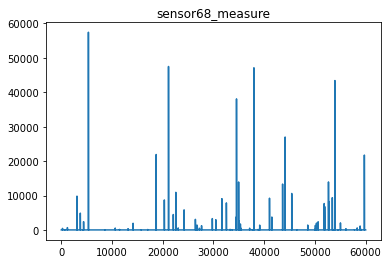

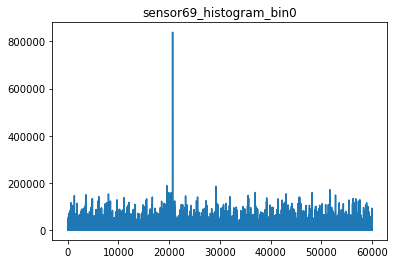

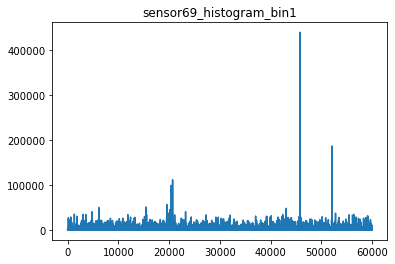

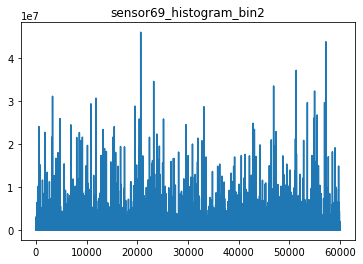

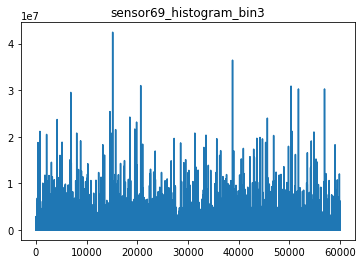

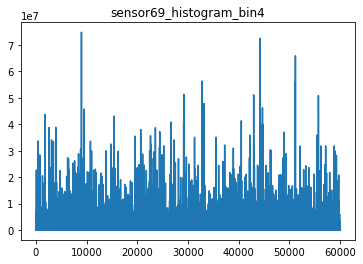

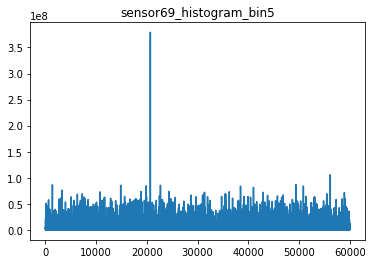

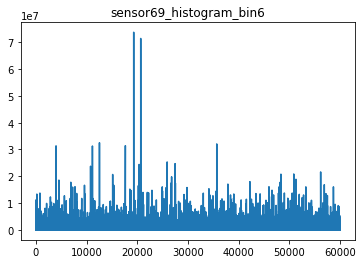

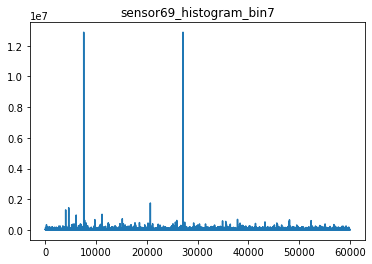

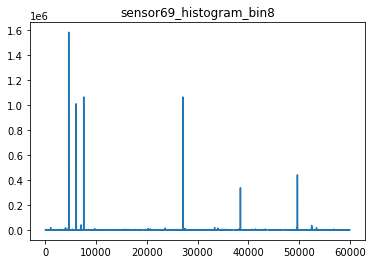

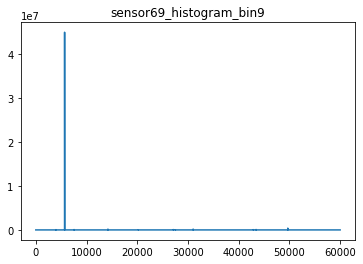

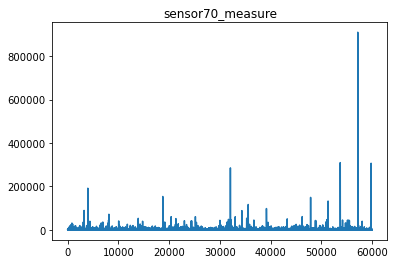

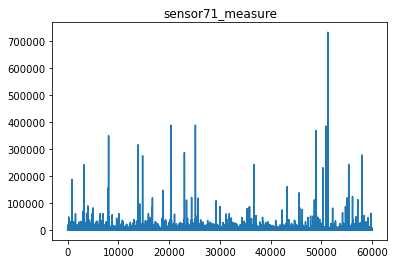

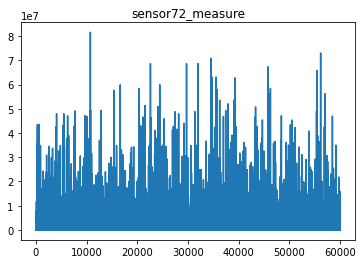

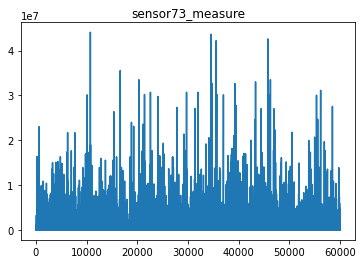

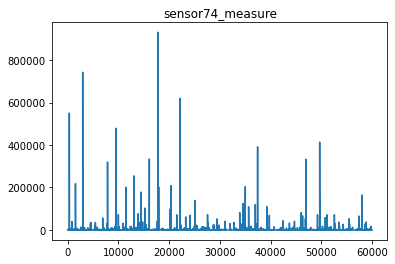

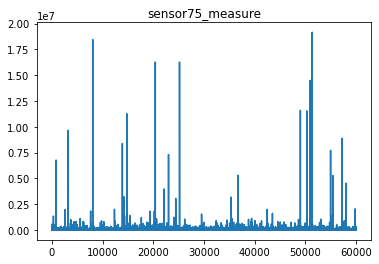

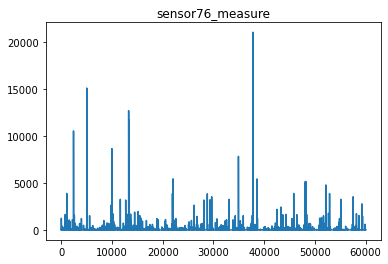

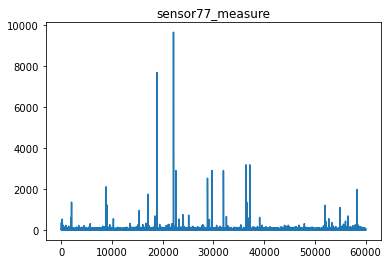

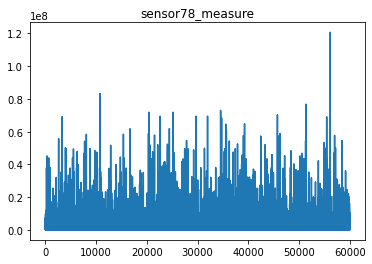

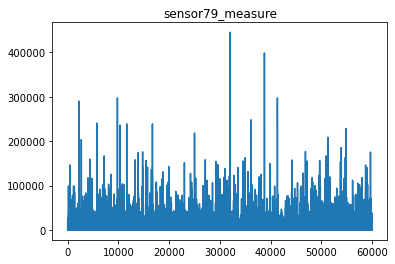

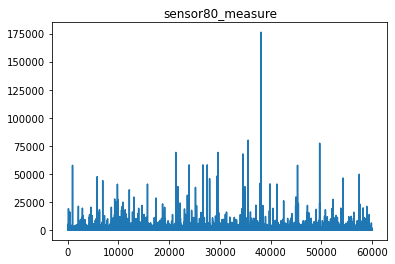

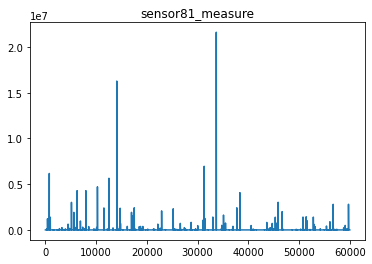

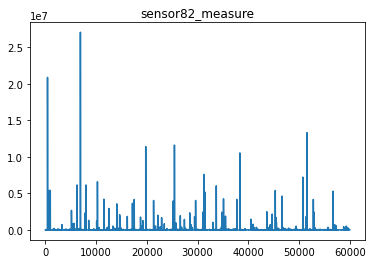

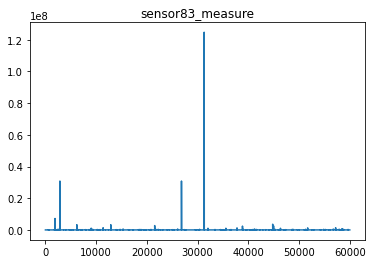

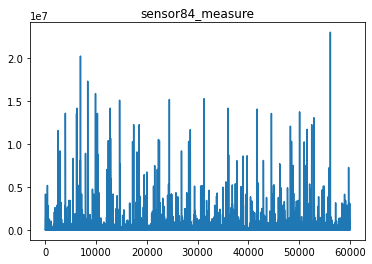

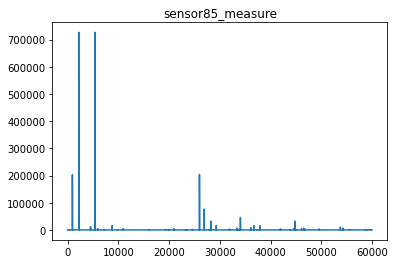

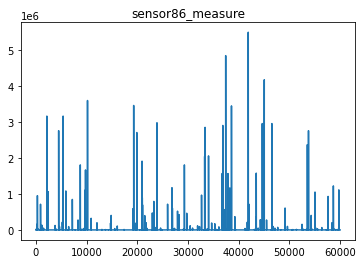

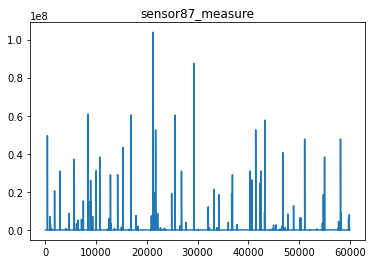

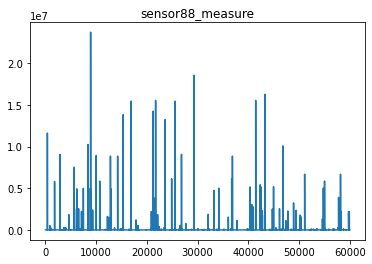

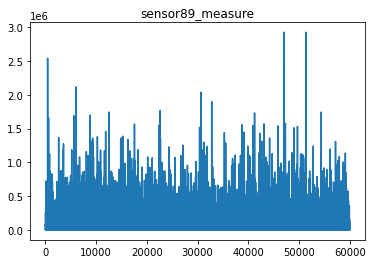

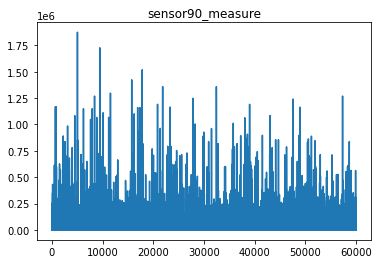

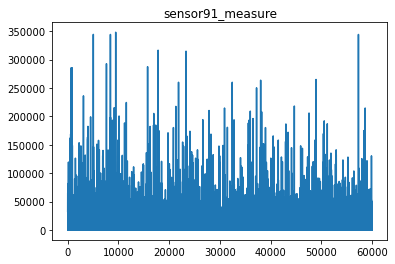

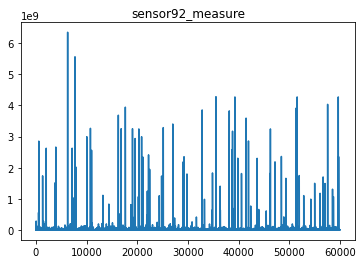

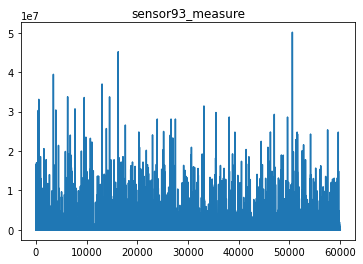

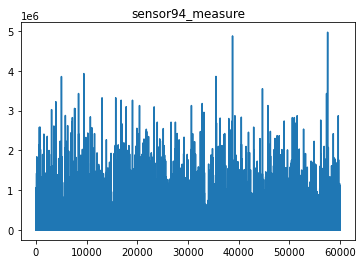

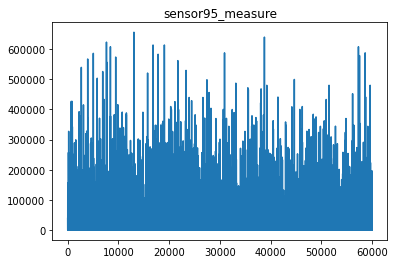

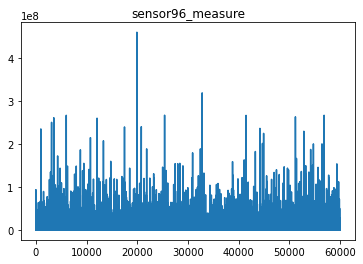

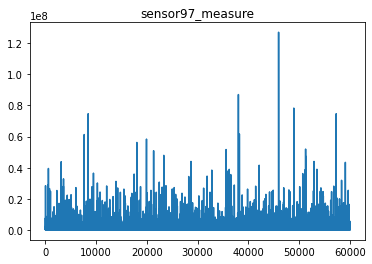

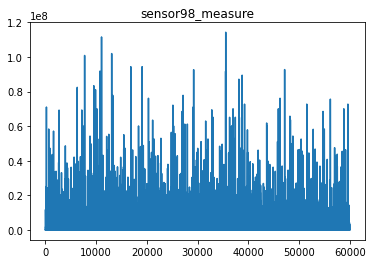

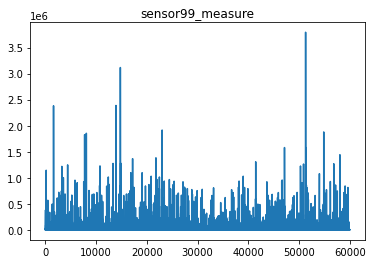

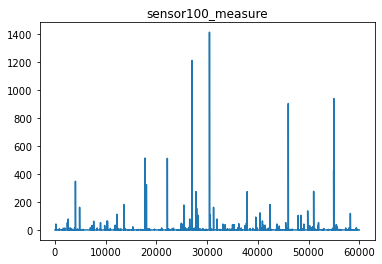

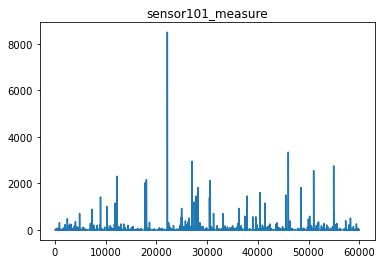

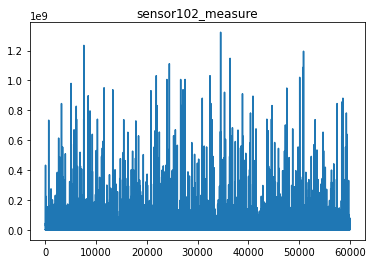

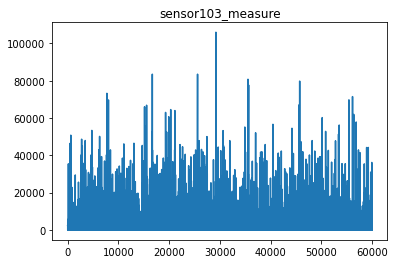

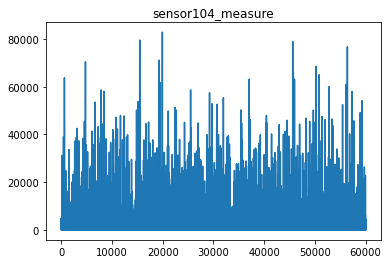

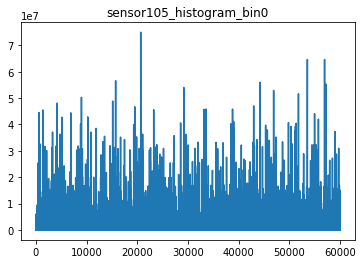

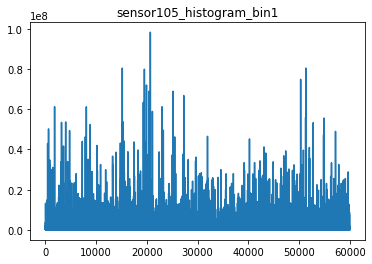

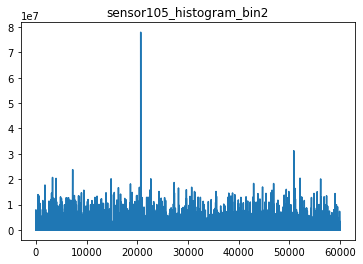

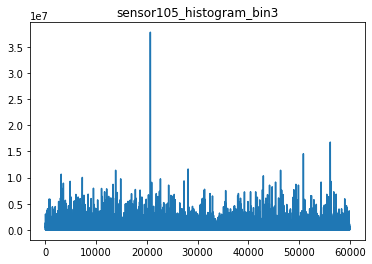

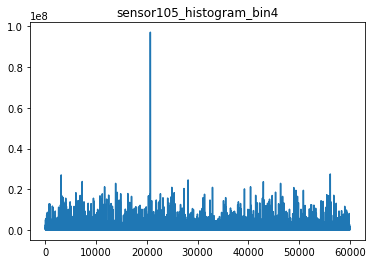

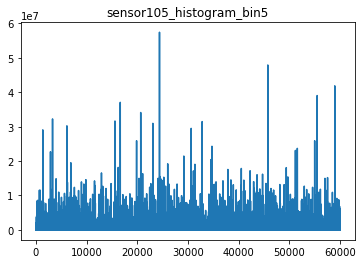

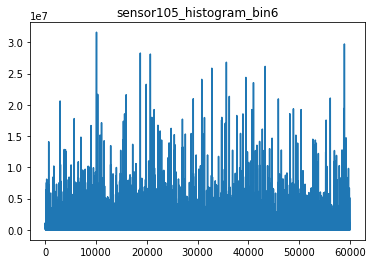

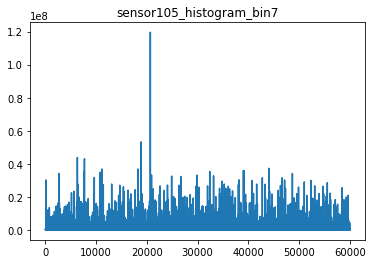

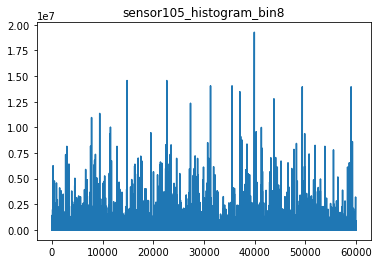

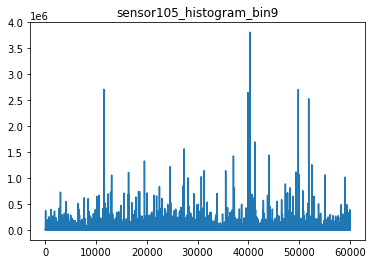

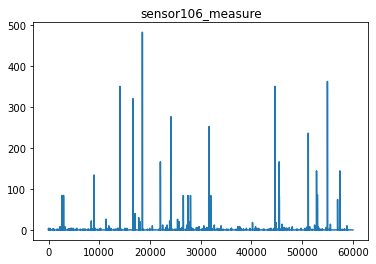

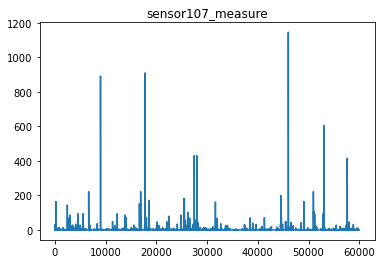

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
for i, col in enumerate(df_temp.columns[2:]):
    df_temp[col].plot(fig=plt.figure(i))
    plt.title(col)
plt.show()

### We have to take care of imbalanced data in this dataset. To remind let's check it one more time

In [22]:
df_temp.target.value_counts()

0    59000
1     1000
Name: target, dtype: int64

### To get more examples where the target is "1" we can try oversampling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [24]:
X = df_temp.drop("target", axis=1)
y = df_temp["target"]

In [25]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 37)

In [26]:
# We have to combine them back to resampling
train_data = pd.concat([X_train, y_train], axis =1)

In [27]:
# Separate minority and majority classes
negative = train_data[train_data.target==0]
positive = train_data[train_data.target==1]

In [28]:
# Unsample minority
pos_upsampled = resample(positive, replace=True, n_samples=len(negative), random_state=37)

In [29]:
# Combine majority and unsampled minority
upsampled = pd.concat([negative, pos_upsampled])

In [30]:
# Let's now check how it looks like
upsampled.target.value_counts()

0    47215
1    47215
Name: target, dtype: int64

#### Now it's time for some modeling

In [31]:
X = upsampled.drop("target", axis=1)
y = upsampled["target"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pickle

In [34]:
# Let's see the Logistic Regression first and save the model for future use
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
pickle.dump(model, open("regr_model.sav", 'wb'))
model.score(X_test, y_test)

E:\Miniconda\ConocoPhillips\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9567404426559356

In [35]:
# Now let's do the same with Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pickle.dump(clf, open("class_model.sav", 'wb'))
clf.score(X_test, y_test)

0.9990469130572911

### Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[9396,   18],
       [   0, 9472]], dtype=int64)

In [37]:
pd.crosstab(y_test,
            y_preds, 
            rownames = ["Actual labels"],
            colnames = ["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,9396,18
1,0,9472


### Classification report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9414
           1       1.00      1.00      1.00      9472

    accuracy                           1.00     18886
   macro avg       1.00      1.00      1.00     18886
weighted avg       1.00      1.00      1.00     18886



### Now we can upload the test data and use models to predict failures

In [101]:
df_test = pd.read_csv("data/equip_failures_test_set.csv")

In [102]:
df_test.head(20)

,id,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor24_histogram_bin9,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor25_histogram_bin9,sensor26_histogram_bin0,sensor26_histogram_bin1,sensor26_histogram_bin2,sensor26_histogram_bin3,sensor26_histogram_bin4,sensor26_histogram_bin5,sensor26_histogram_bin6,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor27_measure,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor32_measure,sensor33_measure,sensor34_measure,sensor35_measure,sensor36_measure,sensor37_measure,sensor38_measure,sensor39_measure,sensor40_measure,sensor41_measure,sensor42_measure,sensor43_measure,sensor44_measure,sensor45_measure,sensor46_measure,sensor47_measure,sensor48_measure,sensor49_measure,sensor50_measure,sensor51_measure,sensor52_measure,sensor53_measure,sensor54_measure,sensor55_measure,sensor56_measure,sensor57_measure,sensor58_measure,sensor59_measure,sensor60_measure,sensor61_measure,sensor62_measure,sensor63_measure,sensor64_histogram_bin0,sensor64_histogram_bin1,sensor64_histogram_bin2,sensor64_histogram_bin3,sensor64_histogram_bin4,sensor64_histogram_bin5,sensor64_histogram_bin6,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor65_measure,sensor66_measure,sensor67_measure,sensor68_measure,sensor69_histogram_bin0,sensor69_histogram_bin1,sensor69_histogram_bin2,sensor69_histogram_bin3,sensor69_histogram_bin4,sensor69_histogram_bin5,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor73_measure,sensor74_measure,sensor75_measure,sensor76_measure,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,66888,na,2130706438,332,0,0,0,0,0,0,57568,2741842,1537660,119084,10960,916,1967396,119208,0,0,0,0,2985164,1560298,1654976,1359980,0,0,2404,0,934,150,0,0,0,0,0,0,3279256,1187682,1092,0,2716,782,1090,39202,3053880,1370286,74,0,0,0,1402416,1063560,379692,254052,192754,160436,190492,737014,87614,0,4640530,446,46,954,4,1967396,105446,625718,1026922,450020,432900,438640,na,na,na,na,na,328200,66888.9,4640530,4640530,4620874,31990,5052,95788,1006700,4468030,1209600,126628,2,120,0,3843046.08,0,621043.2,0,0,0,0,5202,762124,2421504,1190812,80046,7562,780,0,280,292,4640530,na,4712,518,39840,422664,111858,2716284,11457

In [103]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16001 entries, 0 to 16000
Columns: 171 entries, id to sensor107_measure
dtypes: int64(2), object(169)
memory usage: 20.9+ MB


In [104]:
# We have to prepare data for testing
df_test.replace(to_replace="na", value=np.nan, inplace=True)

In [105]:
df_test.fillna(0, inplace=True)

In [106]:
df_test.head()

,id,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor24_histogram_bin9,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor25_histogram_bin9,sensor26_histogram_bin0,sensor26_histogram_bin1,sensor26_histogram_bin2,sensor26_histogram_bin3,sensor26_histogram_bin4,sensor26_histogram_bin5,sensor26_histogram_bin6,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor27_measure,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor32_measure,sensor33_measure,sensor34_measure,sensor35_measure,sensor36_measure,sensor37_measure,sensor38_measure,sensor39_measure,sensor40_measure,sensor41_measure,sensor42_measure,sensor43_measure,sensor44_measure,sensor45_measure,sensor46_measure,sensor47_measure,sensor48_measure,sensor49_measure,sensor50_measure,sensor51_measure,sensor52_measure,sensor53_measure,sensor54_measure,sensor55_measure,sensor56_measure,sensor57_measure,sensor58_measure,sensor59_measure,sensor60_measure,sensor61_measure,sensor62_measure,sensor63_measure,sensor64_histogram_bin0,sensor64_histogram_bin1,sensor64_histogram_bin2,sensor64_histogram_bin3,sensor64_histogram_bin4,sensor64_histogram_bin5,sensor64_histogram_bin6,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor65_measure,sensor66_measure,sensor67_measure,sensor68_measure,sensor69_histogram_bin0,sensor69_histogram_bin1,sensor69_histogram_bin2,sensor69_histogram_bin3,sensor69_histogram_bin4,sensor69_histogram_bin5,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor73_measure,sensor74_measure,sensor75_measure,sensor76_measure,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,66888,0,2130706438,332,0,0,0,0,0,0,57568,2741842,1537660,119084,10960,916,1967396,119208,0,0,0,0,2985164,1560298,1654976,1359980,0,0,2404,0,934,150,0,0,0,0,0,0,3279256,1187682,1092,0,2716,782,1090,39202,3053880,1370286,74,0,0,0,1402416,1063560,379692,254052,192754,160436,190492,737014,87614,0,4640530,446,46,954,4,1967396,105446,625718,1026922,450020,432900,438640,0,0,0,0,0,328200,66888.9,4640530,4640530,4620874,31990,5052,95788,1006700,4468030,1209600,126628,2,120,0,3843046.08,0,621043.2,0,0,0,0,5202,762124,2421504,1190812,80046,7562,780,0,280,292,4640530,0,4712,518,39840,422664,111858,2716284,1145776,2623

In [107]:
# Now let's use RandomForestClassifier on a test dataset
results = clf.predict(df_test)

In [108]:
# We have to get the data to the required by Kaggle form
df_test['target'] = results

In [109]:
submission = df_test[['id', 'target']]

In [110]:
submission.head(10)

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [154]:
# Let's save it to CSV file
submission.to_csv('sample_submission.csv')

### Because I wasn't participating this contest I found a submission file with very good score (over 99%) so the best way to check my results would be to compare those two files

In [155]:
compare_submission = pd.read_csv("data/submission_compare.csv")

In [156]:
compare_submission.head(10)

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [157]:
compare_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16001 entries, 0 to 16000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      16001 non-null  int64
 1   target  16001 non-null  int64
dtypes: int64(2)
memory usage: 250.1 KB


In [158]:
#compare_submission.drop("id", axis=1, inplace=True)

In [159]:
compare_submission.rename(columns = {'target': 'comp_target'}, inplace=True)

In [160]:
compare_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16001 entries, 0 to 16000
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           16001 non-null  int64
 1   comp_target  16001 non-null  int64
dtypes: int64(2)
memory usage: 250.1 KB


In [161]:
submission.head(10)

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [162]:
compare_submission.head(10)

,id,comp_target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [163]:
compare = pd.merge(submission, compare_submission)

In [164]:
compare.head(20)

,id,target,comp_target
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
5,6,0,0
6,7,0,0
7,8,0,0
8,9,0,0
9,10,0,0


In [165]:
comparison_column = np.where(compare["target"] == compare["comp_target"], True, False)
compare["comparison"] = comparison_column

In [166]:
compare.head(20)

,id,target,comp_target,comparison
0,1,0,0,True
1,2,0,0,True
2,3,0,0,True
3,4,0,0,True
4,5,0,0,True
5,6,0,0,True
6,7,0,0,True
7,8,0,0,True
8,9,0,0,True
9,10,0,0,True


In [167]:
compare.comparison.value_counts()

True     15905
False       96
Name: comparison, dtype: int64

In [171]:
result = (15905/(96+15905))*100

In [172]:
print(f'{result} %')

99.4000374976564 %


### When comparing results to succesfull submission from Kaggle the result is very promissing!